In [393]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2021-06-08/2022-06-09/A201'
resultado = requests.get(url)

In [394]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [395]:
import pandas as pd
import numpy as np

In [396]:
dados_tabla = pd.read_json(dados_str)
dados_tabla


,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1008.5,29.2,-1.411228,1008.5,PA,-0.8,22.9,26.2,-48.439512,...,0.2,22.7,26.8,13.1,3.1,28.0,26.8,79.0,A201,0
1,BELÉM,1008.9,29.1,-1.411228,1008.9,PA,-2.6,23.0,26.5,-48.439512,...,0.2,22.8,26.9,13.0,3.2,28.0,26.6,81.0,A201,100
2,BELÉM,1009.6,29.3,-1.411228,1009.6,PA,-3.3,24.2,26.0,-48.439512,...,0.6,23.0,26.6,13.0,4.0,28.0,26.0,90.0,A201,200
3,BELÉM,1009.2,28.9,-1.411228,1009.6,PA,-2.0,24.4,25.4,-48.439512,...,0.4,24.2,26.1,13.0,4.0,27.0,25.4,94.0,A201,300
4,BELÉM,1008.6,28.7,-1.411228,1009.2,PA,-2.0,24.5,25.4,-48.439512,...,1.1,24.4,25.5,13.0,4.3,27.0,25.5,94.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,BELÉM,1007.0,33.5,-1.411228,1007.1,PA,1748.5,25.5,28.1,-48.439512,...,1.3,24.6,31.0,14.6,4.0,33.0,30.7,74.0,A201,1900
8804,BELÉM,1008.3,25.5,-1.411228,1008.7,PA,142.9,22.7,23.3,-48.439512,...,1.4,22.6,30.8,13.1,11.3,30.0,23.3,96.0,A201,2000
8805,BELÉM,1008.6,26.6,-1.411228,1008.6,PA,17.7,22.8,23.3,-48.439512,...,0.1,22.6,23.5,13.1,4.1,27.0,23.4,97.0,A201,2100
8806,BELÉM,1009.0,26.6,-1.411228,1009.0,PA,1.6,22.9,23.3,-48.439512,...,0.4,22.8,23.4,13.0,1.9,26.0,23.4,97.0,A201,2200


In [397]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8803,2022-06-09,1900,30.7,74.0,1748.5
8804,2022-06-09,2000,23.3,96.0,142.9
8805,2022-06-09,2100,23.4,97.0,17.7
8806,2022-06-09,2200,23.4,97.0,1.6


# Renomia o titulo do nosso dados

In [398]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [399]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8803,2022-06-09,1900,30.7,74.0,1748.5
8804,2022-06-09,2000,23.3,96.0,142.9
8805,2022-06-09,2100,23.4,97.0,17.7
8806,2022-06-09,2200,23.4,97.0,1.6


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

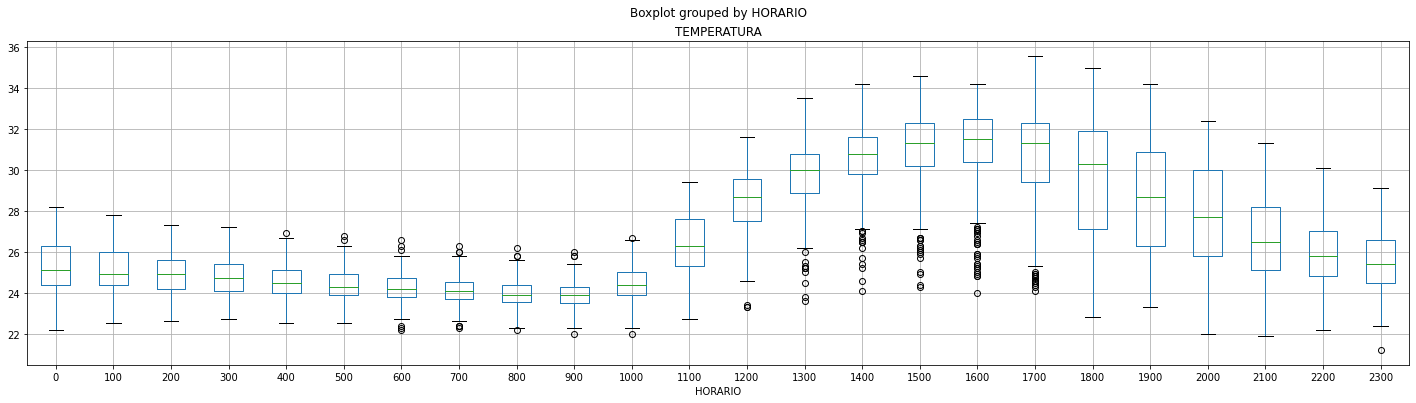

In [400]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

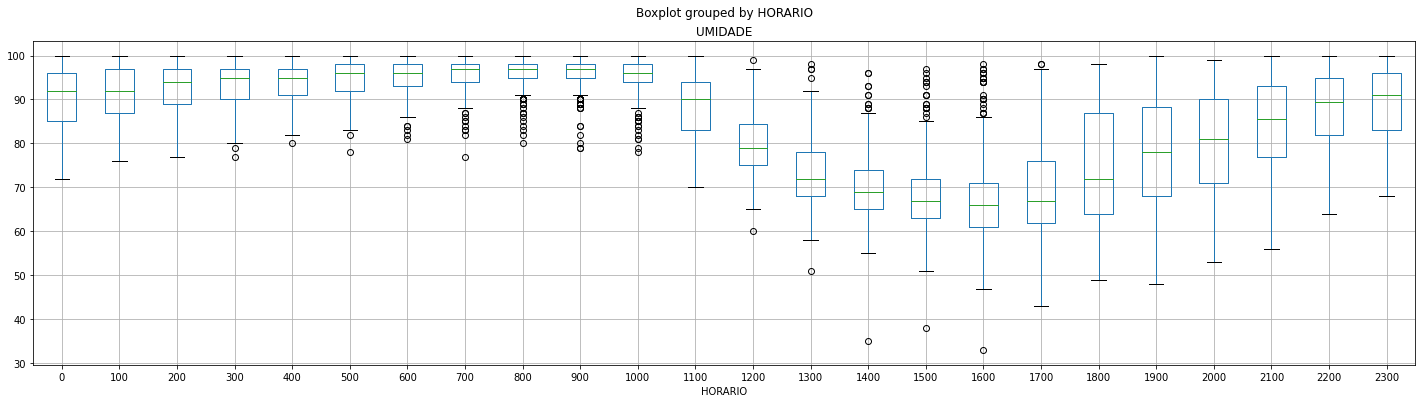

In [401]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

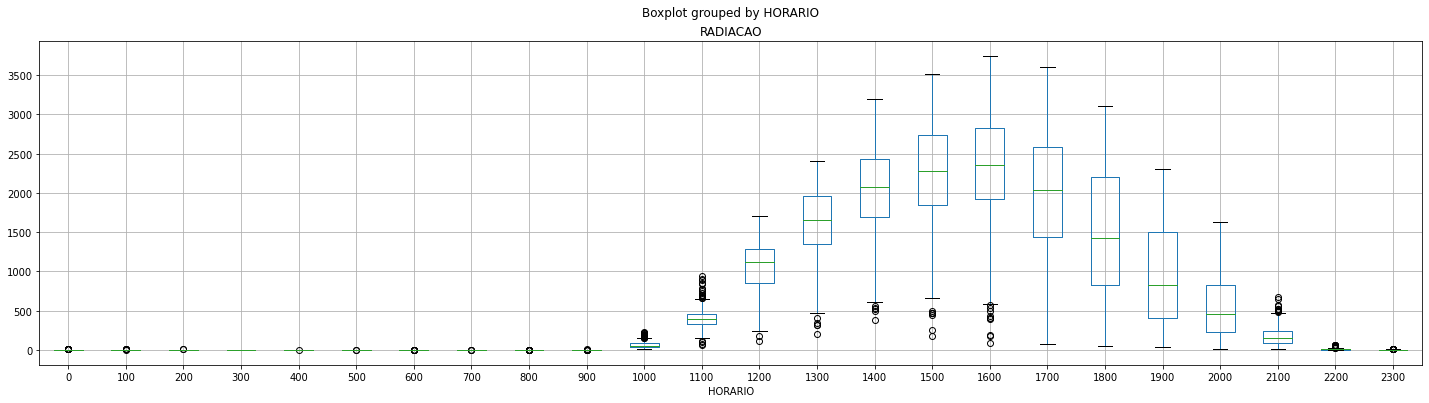

In [402]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [403]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.010445
UMIDADE        0.033833
RADIACAO       0.010445
dtype: float64

In [404]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
2696,2021-09-28,800,NaN,NaN,NaN
2697,2021-09-28,900,NaN,NaN,NaN
2698,2021-09-28,1000,NaN,NaN,NaN
2699,2021-09-28,1100,NaN,NaN,NaN
2700,2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...,...
6457,2022-03-04,100,NaN,NaN,NaN
6554,2022-03-08,200,NaN,NaN,NaN
6649,2022-03-12,100,NaN,NaN,NaN
6815,2022-03-18,2300,NaN,NaN,NaN


In [405]:
dados = dados.fillna(method='ffill')

In [406]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [407]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:>

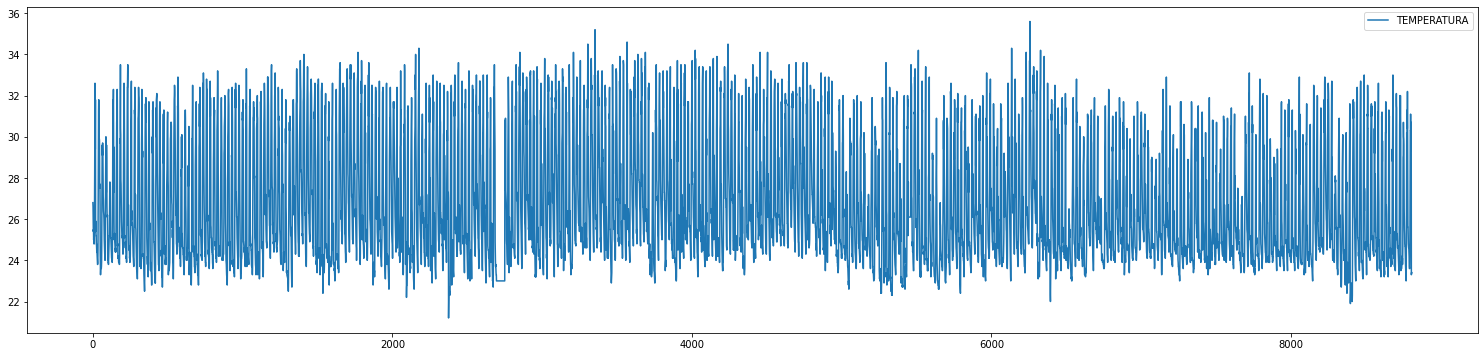

In [408]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [409]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,9302.3,33124.0,-380.4
100,9231.5,33481.0,-490.7
200,9154.2,33866.0,-580.2
300,9080.7,34210.0,-659.2
400,9009.8,34485.0,-678.3
500,8943.3,34715.0,-707.3
600,8889.1,34912.0,-710.9
700,8837.3,35075.0,-712.6
800,8791.9,35190.0,-719.8


In [410]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8803,2022-06-09,1900,30.7,74.0,1748.5
8804,2022-06-09,2000,23.3,96.0,142.9
8805,2022-06-09,2100,23.4,97.0,17.7
8806,2022-06-09,2200,23.4,97.0,1.6


### Criando novos colunas para Temperatura para amanha, Umidade para amanha e Radiação para amanha na tabla 

In [411]:
dados['TEMP_AMANHA'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [412]:
dados['UMID_AMANHA'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [413]:
dados['RADI_AMANHA'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [414]:
dados['HORARIO_ATUAL'] = dados.shift(2)['HORARIO']


In [415]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHA,TEMP_MES_MIX,UMID_AMANHA,UMID_MES_MIX,RADI_AMANHA,RADI_MES_MIX,HORARIO_ATUAL
0,2021-06-08,0,26.8,79.0,-0.8,26.6,NaN,81.0,NaN,-2.6,NaN,NaN
1,2021-06-08,100,26.6,81.0,-2.6,26.0,NaN,90.0,NaN,-3.3,NaN,NaN
2,2021-06-08,200,26.0,90.0,-3.3,25.4,NaN,94.0,NaN,-2.0,NaN,0.0
3,2021-06-08,300,25.4,94.0,-2.0,25.5,NaN,94.0,NaN,-2.0,NaN,100.0
4,2021-06-08,400,25.5,94.0,-2.0,25.0,NaN,97.0,NaN,-1.6,NaN,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,2022-06-09,1900,30.7,74.0,1748.5,23.3,27.266667,96.0,83.500000,142.9,912.606667,1700.0
8804,2022-06-09,2000,23.3,96.0,142.9,23.4,27.050000,97.0,84.266667,17.7,854.886667,1800.0
8805,2022-06-09,2100,23.4,97.0,17.7,23.4,26.890000,97.0,84.800000,1.6,791.070000,1900.0
8806,2022-06-09,2200,23.4,97.0,1.6,23.4,26.626667,97.0,85.833333,1.6,694.530000,2000.0


In [416]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA             0.000000
HORARIO          0.000000
TEMPERATURA      0.000000
UMIDADE          0.000000
RADIACAO         0.000000
TEMP_AMANHA      0.000114
TEMP_MES_MIX     0.003292
UMID_AMANHA      0.000114
UMID_MES_MIX     0.003292
RADI_AMANHA      0.000114
RADI_MES_MIX     0.003292
HORARIO_ATUAL    0.000227
dtype: float64

### Limpando NULL

In [417]:
dados = dados.iloc[63:,:].copy()
dados = dados.iloc[:-5, :].copy()

In [418]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHA,TEMP_MES_MIX,UMID_AMANHA,UMID_MES_MIX,RADI_AMANHA,RADI_MES_MIX,HORARIO_ATUAL
63,2021-06-10,1500,29.4,72.0,1057.4,29.1,27.020000,75.0,84.166667,1357.5,558.280000,1300.0
64,2021-06-10,1600,29.1,75.0,1357.5,29.7,27.170000,62.0,83.333333,1337.7,601.130000,1400.0
65,2021-06-10,1700,29.7,62.0,1337.7,29.5,27.276667,66.0,82.266667,1216.5,629.616667,1500.0
66,2021-06-10,1800,29.5,66.0,1216.5,28.9,27.296667,67.0,82.000000,698.3,626.563333,1600.0
67,2021-06-10,1900,28.9,67.0,698.3,27.7,27.253333,75.0,81.966667,314.4,587.590000,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8798,2022-06-09,1400,30.3,70.0,1895.1,31.1,26.560000,69.0,85.700000,2693.8,704.680000,1200.0
8799,2022-06-09,1500,31.1,69.0,2693.8,30.2,26.830000,72.0,84.733333,2845.6,794.556667,1300.0
8800,2022-06-09,1600,30.2,72.0,2845.6,30.3,27.046667,68.0,83.866667,1481.9,888.156667,1400.0
8801,2022-06-09,1700,30.3,68.0,1481.9,29.3,27.213333,83.0,83.133333,1091.3,923.473333,1500.0


In [419]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA             0.0
HORARIO          0.0
TEMPERATURA      0.0
UMIDADE          0.0
RADIACAO         0.0
TEMP_AMANHA      0.0
TEMP_MES_MIX     0.0
UMID_AMANHA      0.0
UMID_MES_MIX     0.0
RADI_AMANHA      0.0
RADI_MES_MIX     0.0
HORARIO_ATUAL    0.0
dtype: float64

In [420]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [421]:
from sklearn.metrics import mean_absolute_percentage_error

In [422]:
ridge = Ridge()
parametros = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
reg = GridSearchCV(ridge,parametros, cv=5)
#reg = Ridge(alpha=0, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [423]:
numerio_de_dados = len(dados)+39

In [424]:
def criar_previsões_temp(preditores, dados, reg):
    #numerio_de_dados = len(dados)-24
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMP_AMANHA"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMANHA"],preditores)
    conjunto = pd.concat([teste['TEMP_AMANHA'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    print(reg.best_params_)
    return erro, conjunto

In [425]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMIDADE"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMIDADE"],preditores)
    conjunto = pd.concat([teste["UMIDADE"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    print(reg.best_params_)
    return erro, conjunto

In [426]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHA"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHA"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHA"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    print(reg.best_params_)
    return erro, conjunto

In [427]:
preditores = ['HORARIO', 'TEMPERATURA','UMID_AMANHA', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [428]:
temp_erro, temp_previsao = criar_previsões_temp(preditores, dados, reg)

{'alpha': 10}


In [429]:
umid_erro, umid_previsao = criar_previsões_umid(preditores, dados, reg)

{'alpha': 45}


In [430]:
radi_erro, radi_previsao = criar_previsões_radi(preditores, dados, reg)

{'alpha': 100}


In [431]:
previsoes_dados = temp_previsao

In [432]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_previsao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

In [433]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_previsao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

In [434]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

In [435]:
previsoes_dados2 = previsoes_dados[['HORARIO','PREVISOES_TEMPERATURA','PREVISOES_UMIDADE','PREVISOES_RADIACAO']]

In [436]:
previsoes_dados2

,HORARIO,PREVISOES_TEMPERATURA,PREVISOES_UMIDADE,PREVISOES_RADIACAO
8779,1700.0,26.726850,74.913354,96.105868
8780,1800.0,25.546018,85.456565,-59.416142
8781,1900.0,25.018756,88.413660,-126.518395
8782,2000.0,24.742903,89.016520,-190.752032
8783,2100.0,24.503527,90.919276,-149.359504
8784,2200.0,24.151753,92.793445,-77.619773
8785,2300.0,24.130827,93.107334,-61.908585
8786,0.0,23.955627,93.713822,-90.172230
8787,100.0,24.321752,93.453259,0.864255
8788,200.0,24.450489,93.937939,59.650111


In [437]:
previsoes_dados

,DATA,HORARIO,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,ATUAL_UMIDADE,PREVISOES_UMIDADE,ATUAL_RADIACAO,PREVISOES_RADIACAO
8779,2022-06-08,1700.0,26.4,26.726850,69.0,74.913354,158.4,96.105868
8780,2022-06-08,1800.0,25.6,25.546018,88.0,85.456565,38.0,-59.416142
8781,2022-06-08,1900.0,25.6,25.018756,89.0,88.413660,2.6,-126.518395
8782,2022-06-08,2000.0,25.1,24.742903,91.0,89.016520,-2.5,-190.752032
8783,2022-06-08,2100.0,24.8,24.503527,93.0,90.919276,-3.0,-149.359504
8784,2022-06-09,2200.0,24.7,24.151753,94.0,92.793445,-1.8,-77.619773
8785,2022-06-09,2300.0,24.6,24.130827,96.0,93.107334,-1.9,-61.908585
8786,2022-06-09,0.0,24.6,23.955627,96.0,93.713822,-1.9,-90.172230
8787,2022-06-09,100.0,24.4,24.321752,97.0,93.453259,-2.2,0.864255
8788,2022-06-09,200.0,24.2,24.450489,95.0,93.937939,-3.5,59.650111


In [438]:
previsoes_dados.to_csv('garoa.csv', index=False)

In [439]:
previsoes_dados2.to_csv('garoa_raw.csv', index=False)


In [440]:
#previsoes_dados.to_excel('garoa.xls', index=False)

In [441]:
umid_erro

0.02701245147221405

In [442]:
temp_erro

0.01739295188607617

In [443]:
radi_erro

14.573304235427427

<AxesSubplot:>

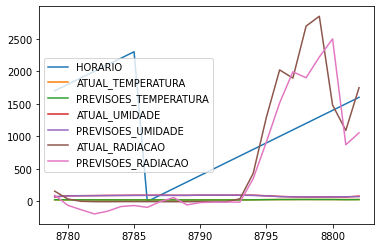

In [444]:
previsoes_dados.plot()

<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

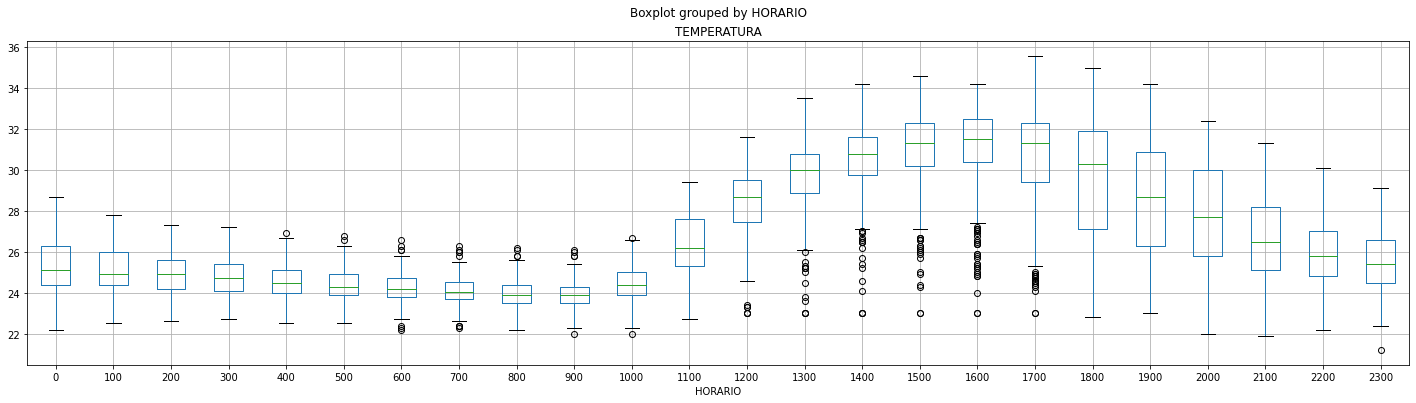

In [445]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'PREVISOES_TEMPERATURA'}, xlabel='HORARIO'>

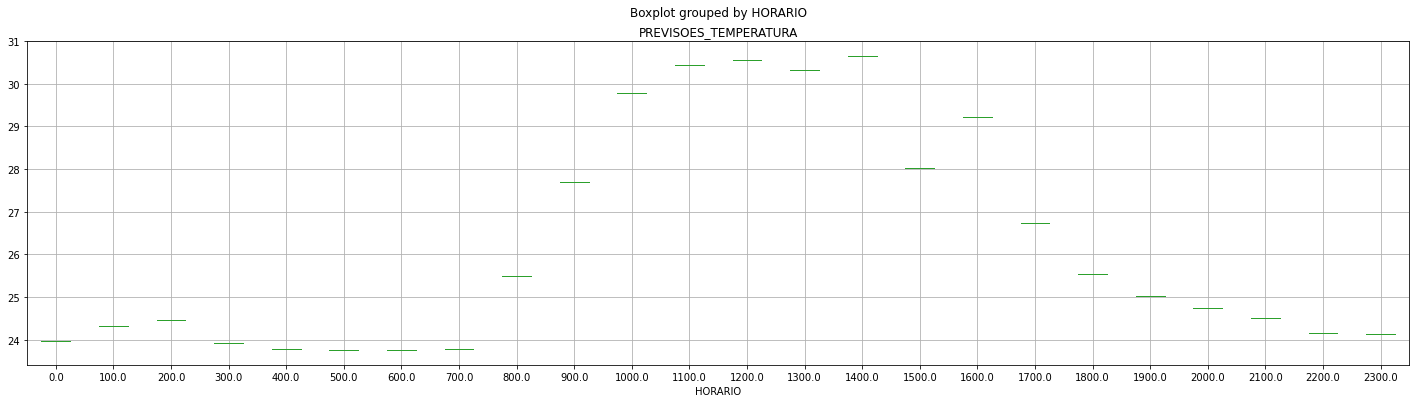

In [446]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

In [447]:
import matplotlib.pyplot as plt


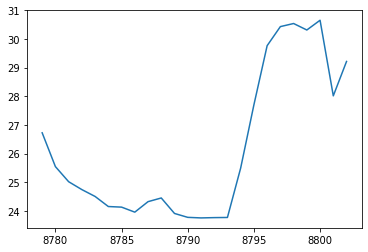

In [448]:
plt.plot( previsoes_dados.PREVISOES_TEMPERATURA)
#plt.plot(previsoes_dados.HORARIO, previsoes_dados.ATUAL_UMIDADE)
#plt.plot(previsoes_dados.HORARIO, previsoes_dados.ATUAL_RADIACAO)

plt.show()